# Who is the Serial Killer?

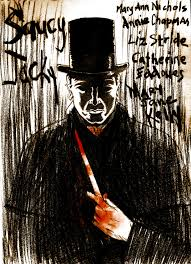



# Chapter 1. Prep

1.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#machine learning
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

1.2 Import Dataset

In [2]:
killer = pd.read_csv("/Users/Yiyi/Documents/Davis/UCD MSBA/Winter/BAX452 Machine Learning /Individual Presentation/input/Homocide.csv",low_memory=False)
killer.head()

Record ID Agency Code Agency Name       Agency Type       City   State  \
0          1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1          2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2          3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
3          4     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
4          5     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   

   Year    Month  Incident              Crime Type      ...       \
0  1980  January         1  Murder or Manslaughter      ...        
1  1980    March         1  Murder or Manslaughter      ...        
2  1980    March         2  Murder or Manslaughter      ...        
3  1980    April         1  Murder or Manslaughter      ...        
4  1980    April         2  Murder or Manslaughter      ...        

  Victim Ethnicity Perpetrator Sex  Perpetrator Age  \
0          Unknown            Male               15   
1          Unknown            Male               42   
2          Unknown         Unknown                0   
3          Unknown            Male               42   
4          Unknown         Unknown                0   

                Perpetrator Race Perpetrator Ethnicity  Relationship  \
0  Native American/Alaska Native               Unknown  Acquaintance   
1                          White               Unknown  Acquaintance   
2                        Unknown               Unknown       Unknown   
3                          White               Unknown  Acquaintance   
4                        Unknown               Unknown       Unknown   

          Weapon Victim Count Perpetrator Count Record Source  
0   Blunt Object            0                 0           FBI  
1  Strangulation            0                 0           FBI  
2        Unknown            0                 0           FBI  
3  Strangulation            0                 0           FBI  
4        Unknown            0                 1           FBI  

[5 rows x 24 columns]

Let's take a look at the data

In [3]:
killer.shape

(638454, 24)

In [4]:
killer.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [5]:
killer.fillna(0)

Record ID Agency Code                Agency Name       Agency Type  \
0               1     AK00101                  Anchorage  Municipal Police   
1               2     AK00101                  Anchorage  Municipal Police   
2               3     AK00101                  Anchorage  Municipal Police   
3               4     AK00101                  Anchorage  Municipal Police   
4               5     AK00101                  Anchorage  Municipal Police   
5               6     AK00101                  Anchorage  Municipal Police   
6               7     AK00101                  Anchorage  Municipal Police   
7               8     AK00101                  Anchorage  Municipal Police   
8               9     AK00101                  Anchorage  Municipal Police   
9              10     AK00101                  Anchorage  Municipal Police   
10             11     AK00101                  Anchorage  Municipal Police   
11             12     AK00101                  Anchorage  Municipal Police   
12             13     AK00101                  Anchorage  Municipal Police   
13             14     AK00101                  Anchorage  Municipal Police   
14             15     AK00101                  Anchorage  Municipal Police   
15             16     AK00101                  Anchorage  Municipal Police   
16             17     AK00101                  Anchorage  Municipal Police   
17             18     AK00103                     Juneau  Municipal Police   
18             19     AK00106                       Nome  Municipal Police   
19             20     AK00113                     Bethel  Municipal Police   
20             21     AK00118        North Slope Borough     County Police   
21             22     AK00118        North Slope Borough     County Police   
22             23     AK00118        North Slope Borough     County Police   
23             24     AK00118        North Slope Borough     County Police   
24             25     AK00118        North Slope Borough     County Police   
25             26     AK00123                      Kenai  Municipal Police   
26             27     AKASP00        Alaska State Police      State Police   
27             28     AKASP00        Alaska State Police      State Police   
28             29     AKASP00        Alaska State Police      State Police   
29             30     AKASP00        Alaska State Police      State Police   
...           ...         ...                        ...               ...   
638424     638425     WVWSP21     State Police: Kingwood      State Police   
638425     638426     WVWSP24     State Police: Danville      State Police   
638426     638427     WVWSP29   State Police: Morgantown      State Police   
638427     638428     WVWSP29   State Police: Morgantown      State Police   
638428     638429     WVWSP33  State Police: Parkersburg      State Police   
638429     638430     WVWSP39    State Police: Princeton      State Police   
638430     638431     WVWSP49       State Police: Sutton      State Police   
638431     638432     WVWSP52        State Police: Wayne      State Police   
638432     638433     WVWSP52        State Police: Wayne      State Police   
638433     638434     WVWSP53   State Police: Upperglade      State Police   
638434     638435     WVWSP55        State Police: Welch      State Police   
638435     638436     WVWSP55        State Police: Welch      State Police   
638436     638437     WVWSP60   State Police: Williamson      State Police   
638437     638438     WVWSP65                Sp: Hundred      State Police   
638438     638439     WVWSP65                Sp: Hundred      State Police   
638439     638440     WVWSP65                Sp: Hundred      State Police   
638440     638441     WY00101                    Laramie  Municipal Police   
638441     638442     WY00300            Campbell County           Sheriff   
638442     638443     WY01100             Laramie County           Sheriff   
638443     638444     WY01101 

In [6]:
killer[['Victim Age']] = killer[['Victim Age']].values
killer['Perpetrator Age']=pd.to_numeric(killer['Perpetrator Age'], errors='coerce')
killer['Perpetrator Age'] = killer['Perpetrator Age'].fillna(0).astype(int)

In [7]:
killer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null int64
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    63845

In [8]:
print(killer.describe())

          Record ID           Year       Incident     Victim Age  \
count  638454.00000  638454.000000  638454.000000  638454.000000   
mean   319227.50000    1995.801102      22.967924      35.033512   
std    184305.93872       9.927693      92.149821      41.628306   
min         1.00000    1980.000000       0.000000       0.000000   
25%    159614.25000    1987.000000       1.000000      22.000000   
50%    319227.50000    1995.000000       2.000000      30.000000   
75%    478840.75000    2004.000000      10.000000      42.000000   
max    638454.00000    2014.000000     999.000000     998.000000   

       Perpetrator Age   Victim Count  Perpetrator Count  
count    638454.000000  638454.000000      638454.000000  
mean         20.322665       0.123334           0.185224  
std          17.886846       0.537733           0.585496  
min           0.000000       0.000000           0.000000  
25%           0.000000       0.000000           0.000000  
50%          21.000000       0.00

# Chapter 2. Feature Engineering & EDA

2.1 Downsizing the Dataset

#1 What is a Serial Killer?

The Federal Bureau of Investigation (FBI), for example, defines serial killing as "a series of two or more murders, committed as separate events, usually, but not always, by one offender acting alone"

So in order to focus on the serial killer classification, we will only look at killers who have two or more than 2 murders, which means victim count >=1, since victim count means 0 means that there is no additional victim)

#2 We will only look at the solved crimes, because there is no info on the unsolved crimes. 

#3 &4  Even within the solved crimes, there is some unusual rows(maybe mistakes) - indicating that perpetrator race is unknown or perpetrator age is 0, therefore we will drop them.

#5 There is no definition on incident and record source is irrelevant for the classification, so we will drop them.

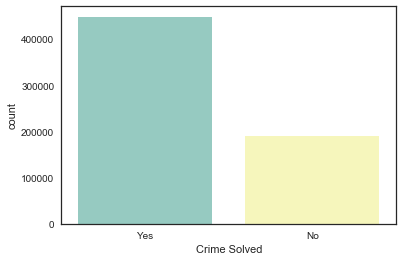

In [9]:
sns.countplot(x="Crime Solved", data=killer,palette = "Set3")

Action:
1. Drop victim count >=1
2. Drop Crime Solved = not

In [10]:
killer = killer.drop(killer[killer['Victim Count']== 0].index)
killer = killer.drop(killer[killer['Crime Solved'] == 'No'].index)

## What about Age?

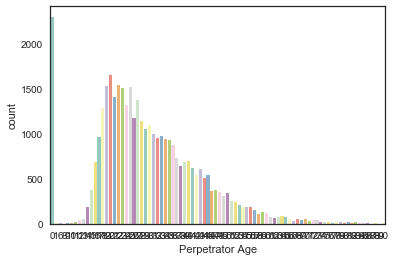

In [11]:
sns.countplot(x="Perpetrator Age", data=killer,palette = "Set3")

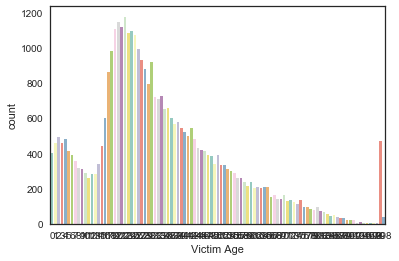

In [12]:
sns.countplot(x="Victim Age", data=killer,palette = "Set3")

In [13]:
#therefore we drop all rows in which perpetrator age =0, or victim age >99(the impossible scenarios)
killer = killer.drop(killer[killer['Perpetrator Age'] == 0].index)
killer = killer.drop(killer[killer['Victim Age'] >99].index)

## What about Race?

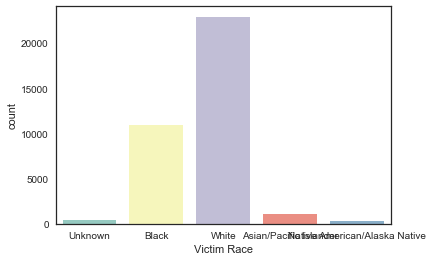

In [14]:
#Victim Race
sns.countplot(x="Victim Race", data=killer,palette = "Set3")

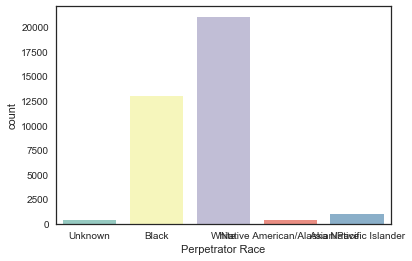

In [15]:
#Perpetrator Race
sns.countplot(x="Perpetrator Race", data=killer,palette = "Set3")

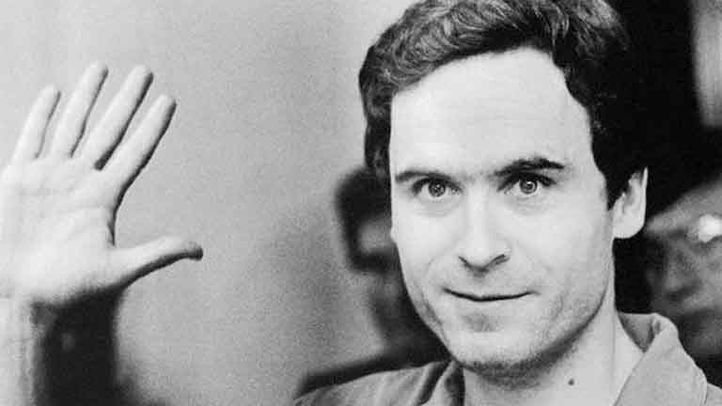

In [16]:
#therefore, we drop perpetrator/victim race who is unknown, because these are the solved cases and we are supposed to know the races
killer = killer.drop(killer[killer['Perpetrator Race'] == 'Unknown'].index)
killer = killer.drop(killer[killer['Victim Race'] == 'Unknown'].index)

## What about Sex?

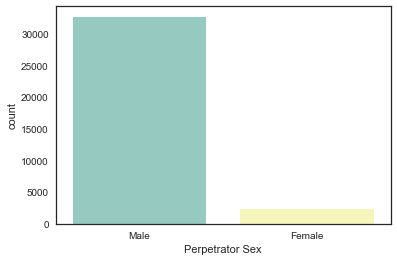

In [17]:
sns.countplot(x="Perpetrator Sex", data=killer,palette = "Set3")

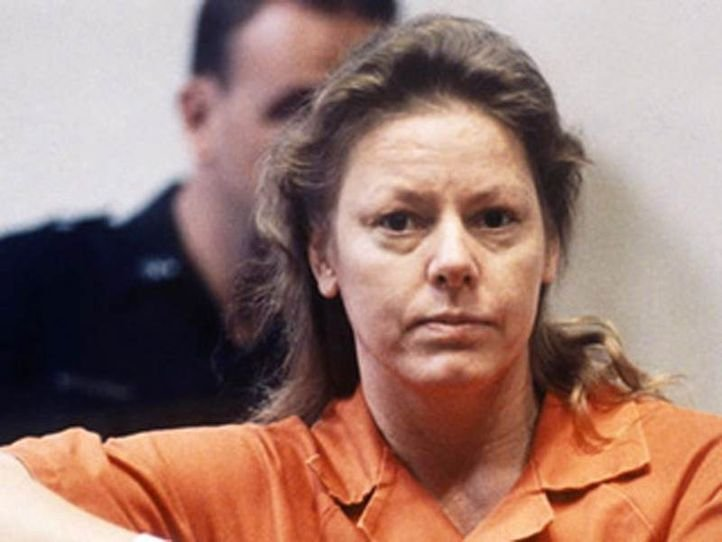

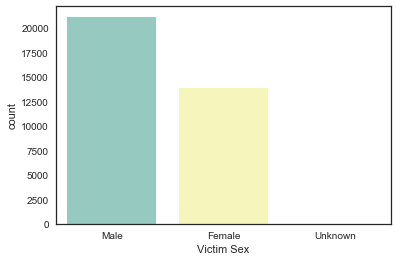

In [18]:
sns.countplot(x="Victim Sex", data=killer,palette = "Set3")

In [19]:
#Drop Unknown Victime Sex 
killer = killer.drop(killer[killer['Victim Sex'] == 'Unknown'].index)

## What about Relationship?

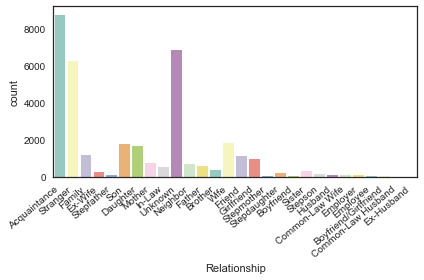

In [20]:
re = sns.countplot(x="Relationship", data=killer,palette = "Set3")
re.set_xticklabels(re.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

What We want to do is to relabel them into fewer categories

In [21]:
killer.loc[(killer['Relationship'] == 'Wife') | (killer['Relationship'] == 'Ex-Wife') |
             (killer['Relationship'] == 'Girlfriend') |
             (killer['Relationship'] == 'Common-Law Wife'), 'Relationship'] = 'Partner-F'

killer.loc[(killer['Relationship'] == 'Husband') | (killer['Relationship'] == 'Ex-Husband') |
             (killer['Relationship'] == 'Boyfriend') | 
             (killer['Relationship'] == 'Common-Law Husband'), 'Relationship'] = 'Partner-M'

killer.loc[(killer['Relationship'] == 'Father') | (killer['Relationship'] == 'In-Law') |
             (killer['Relationship'] == 'Mother') | (killer['Relationship'] == 'Stepfather') |
             (killer['Relationship'] == 'Stepmother'), 'Relationship'] = 'Parent'

killer.loc[(killer['Relationship'] == 'Daughter') | (killer['Relationship'] == 'Son') |
             (killer['Relationship'] == 'Stepdaughter') | 
             (killer['Relationship'] == 'Stepson'), 'Relationship'] = 'Children'

killer.loc[(killer['Relationship'] == 'Brother') | (killer['Relationship'] == 'Sister'),
             'Relationship'] = 'Sibling'

killer.loc[(killer['Relationship'] == 'Employee') | (killer['Relationship'] == 'Employer') ,
             'Relationship'] = 'Work'

killer.loc[(killer['Relationship'] == 'Boyfriend/Girlfriend') & (killer['Victim Sex'] == 'Female'),
             'Relationship'] = 'Partner-F'

killer.loc[(killer['Relationship'] == 'Boyfriend/Girlfriend') & (killer['Victim Sex'] == 'Male') , 'Relationship'] = 'Partner-M'
killer.loc[(killer['Relationship'] == 'Unknown')|(killer['Relationship'] == 'Unknown'),'Relationship'] = 'Stranger'

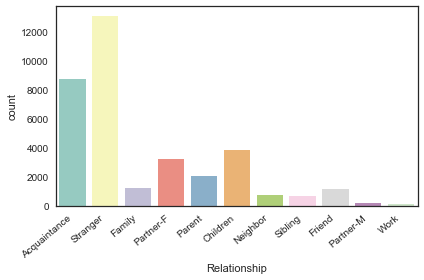

In [22]:
re2 = sns.countplot(x="Relationship", data=killer,palette = "Set3")
re2.set_xticklabels(re2.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

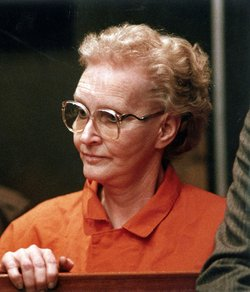

## What about Weapon?

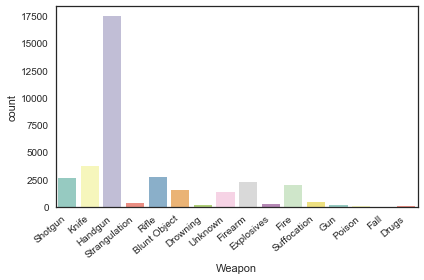

In [23]:
weap = sns.countplot(x="Weapon", data=killer,palette = "Set3")
weap.set_xticklabels(weap.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#Recategorize BECAUSE too many gun types

In [24]:
killer.loc[(killer['Weapon'] == 'Shotgun') | (killer['Weapon'] == 'Handgun') |
             (killer['Weapon'] == 'Rifle') |
             (killer['Weapon'] == 'Firearm')|(killer['Weapon'] == 'Gun'), 'Weapon'] = 'Gun'

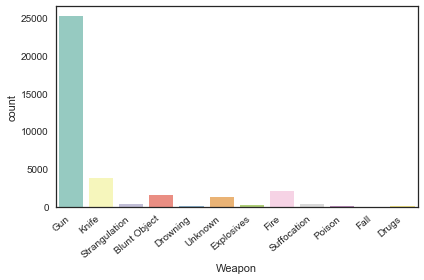

In [25]:
weap2 = sns.countplot(x="Weapon", data=killer,palette = "Set3")
weap2.set_xticklabels(weap2.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

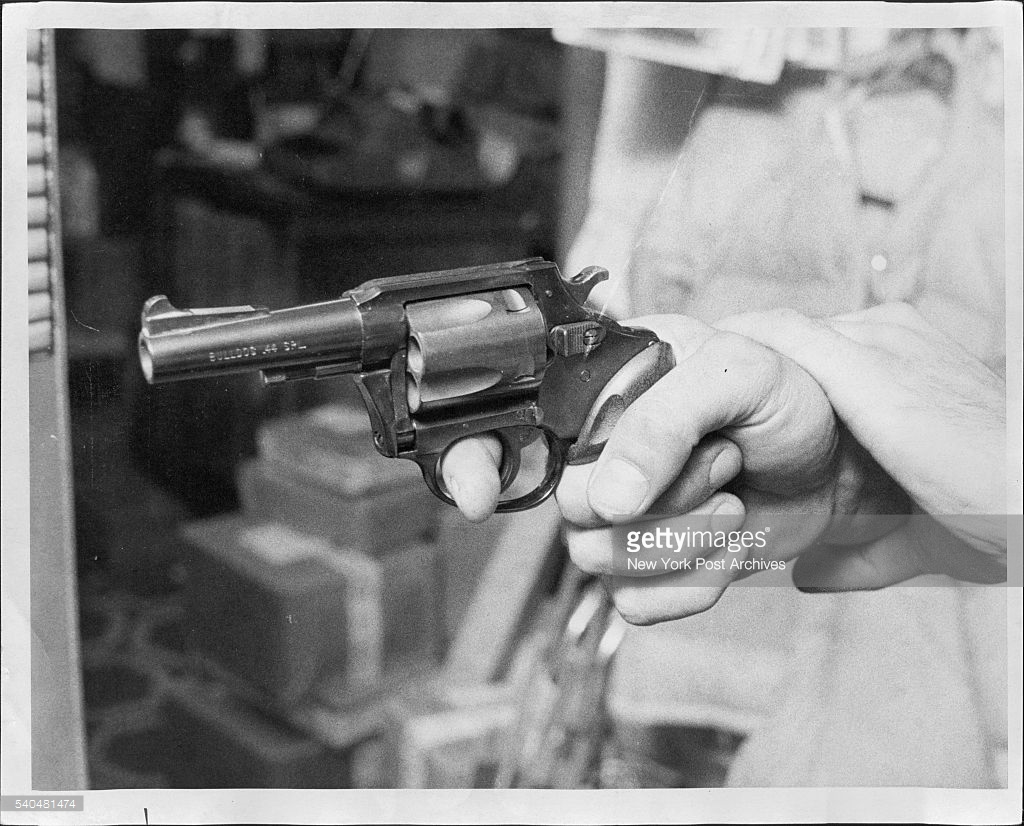

## What about the victim count?

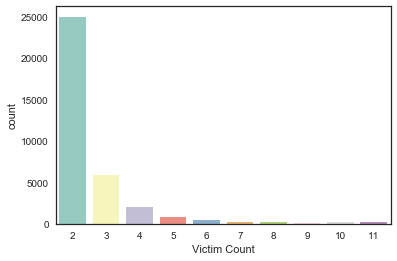

In [26]:
killer['Victim Count'] += 1
sns.countplot(x="Victim Count", data=killer,palette = "Set3")

## What about the Perpetrator Count?

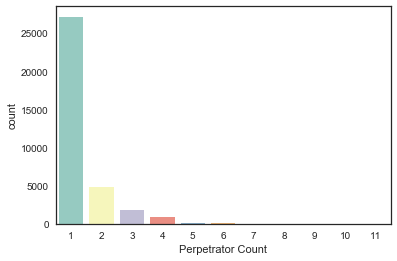

In [27]:
killer['Perpetrator Count'] += 1
sns.countplot(x="Perpetrator Count", data=killer,palette = "Set3")

## What about the Year?

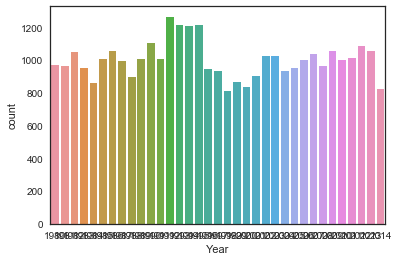

In [28]:
sns.countplot(x="Year", data=killer)

## What about others?

Drop unnecessary columns (RecordId, Incident, Crime Type, Crime Solved#allyes#, Record Source) and reindex

In [29]:
killer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34999 entries, 173 to 638435
Data columns (total 24 columns):
Record ID                34999 non-null int64
Agency Code              34999 non-null object
Agency Name              34999 non-null object
Agency Type              34999 non-null object
City                     34999 non-null object
State                    34999 non-null object
Year                     34999 non-null int64
Month                    34999 non-null object
Incident                 34999 non-null int64
Crime Type               34999 non-null object
Crime Solved             34999 non-null object
Victim Sex               34999 non-null object
Victim Age               34999 non-null int64
Victim Race              34999 non-null object
Victim Ethnicity         34999 non-null object
Perpetrator Sex          34999 non-null object
Perpetrator Age          34999 non-null int64
Perpetrator Race         34999 non-null object
Perpetrator Ethnicity    34999 non-null object


In [30]:
killer.drop(killer.columns[[0,1,2,3,4,5,8,9,10,14,18,23]], axis=1, inplace=True)

In [31]:
killer.head()

Year     Month Victim Sex  Victim Age Victim Race Perpetrator Sex  \
173  1980  December       Male          24       Black            Male   
174  1980  December       Male          18       Black            Male   
190  1980      July       Male          50       White            Male   
223  1980      July       Male          38       White            Male   
314  1980     April       Male          71       White            Male   

     Perpetrator Age Perpetrator Race  Relationship Weapon  Victim Count  \
173               22            Black  Acquaintance    Gun             2   
174               22            Black  Acquaintance    Gun             2   
190               24            White      Stranger  Knife             2   
223               24            White      Stranger  Knife             2   
314               41            White      Stranger    Gun             3   

     Perpetrator Count  
173                  2  
174                  2  
190                  2  
223                  2  
314                  1

## Pairplot

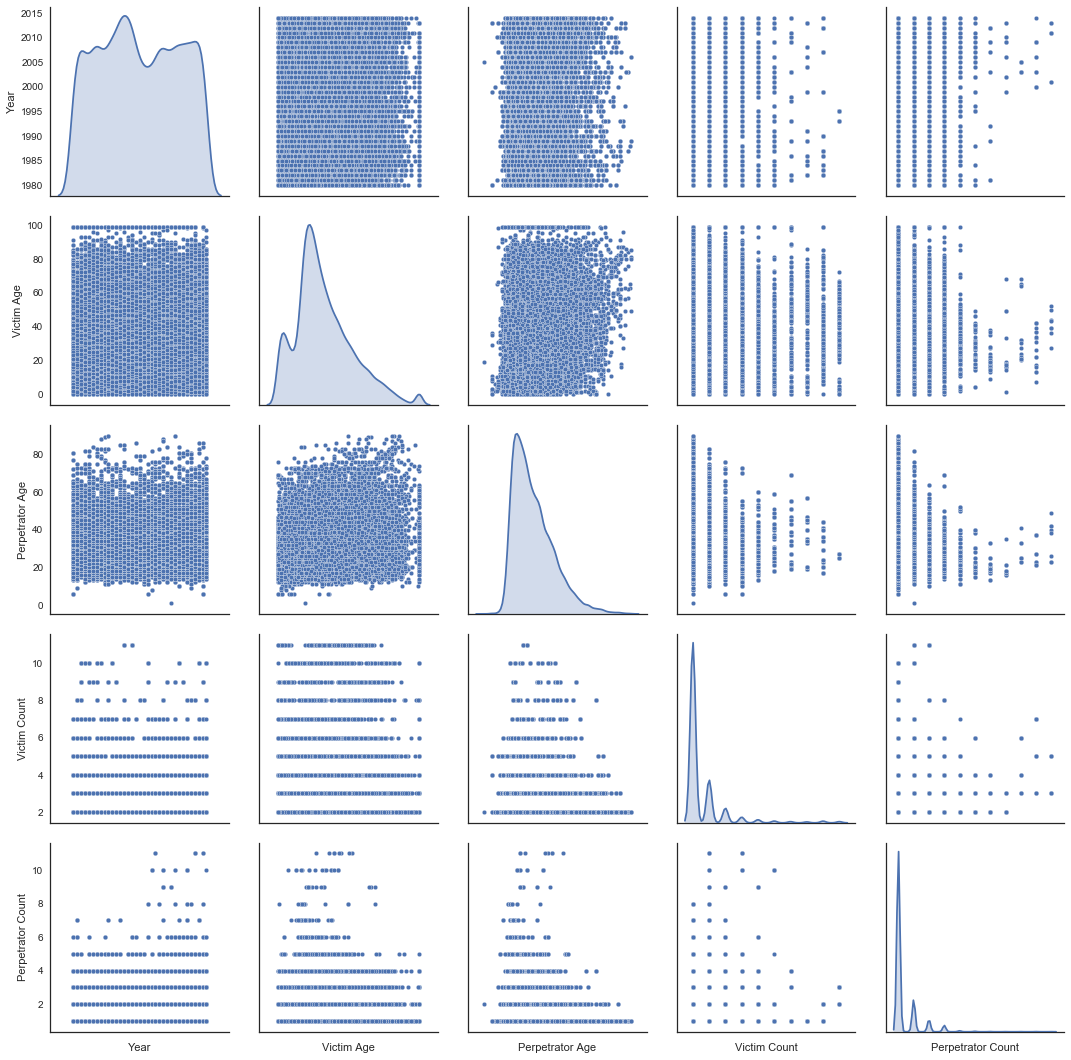

In [32]:
pp = sns.pairplot(killer, hue = None, palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

## Correlation Heatmap

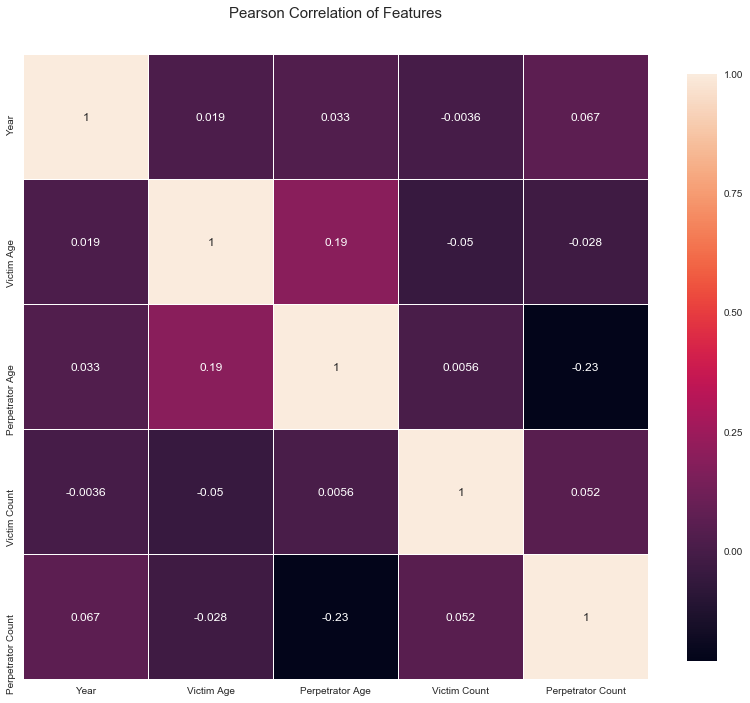

In [33]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(killer)

## Victim Age vs. Perpetrator Age

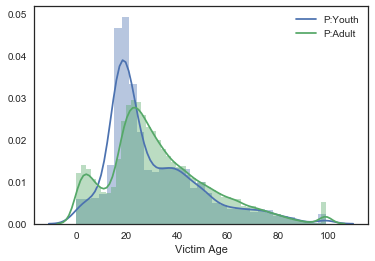

In [34]:
sns.distplot(killer[killer['Perpetrator Age'] <= 18]['Victim Age'], kde_kws={"label": "P:Youth"})
sns.distplot(killer[killer['Perpetrator Age'] > 18]['Victim Age'], kde_kws={"label": "P:Adult"})
#Interpretation: serial killers choose victims similar to his or her own age

## Victim Age vs. Perpetrator Gender

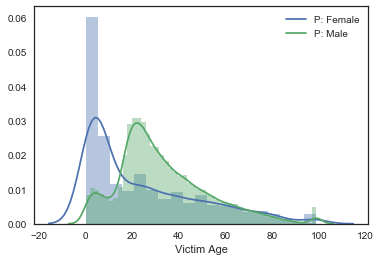

In [35]:
sns.distplot(killer[killer['Perpetrator Sex'] == 'Female']['Victim Age'], kde_kws={"label": "P: Female"})
sns.distplot(killer[killer['Perpetrator Sex'] == 'Male']['Victim Age'], kde_kws={"label": "P: Male"})

#female serial killer choose victims much younger, mostly infants.

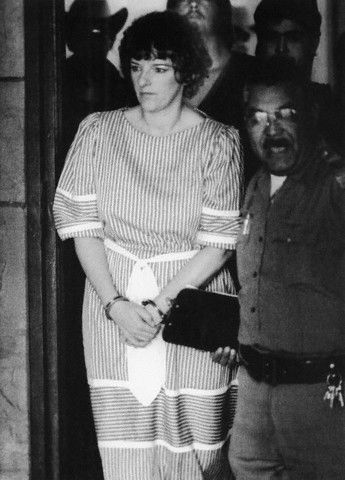

## Perpetrator Age vs. Victim Gender

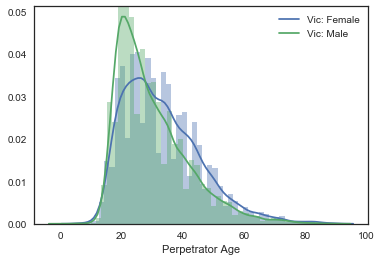

In [36]:
sns.distplot(killer[killer['Victim Sex'] == 'Female']['Perpetrator Age'], kde_kws={"label": "Vic: Female"})
sns.distplot(killer[killer['Victim Sex'] == 'Male']['Perpetrator Age'], kde_kws={"label": "Vic: Male"})

#if victim is male, it is more likely that the perpetrator is around age 20.

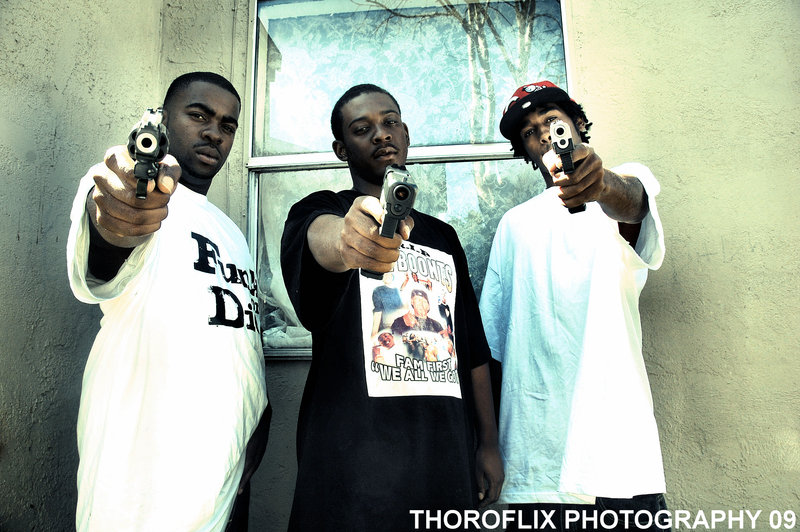

## Perpetrator Age vs. Victim Age

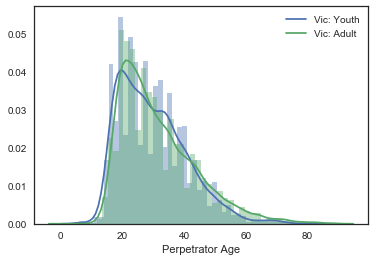

In [37]:
sns.distplot(killer[killer['Victim Age'] <= 18]['Perpetrator Age'], kde_kws={"label": "Vic: Youth"})
sns.distplot(killer[killer['Victim Age'] > 18]['Perpetrator Age'], kde_kws={"label": "Vic: Adult"})
#not much difference

## Perpetrator Race vs. Victim Age

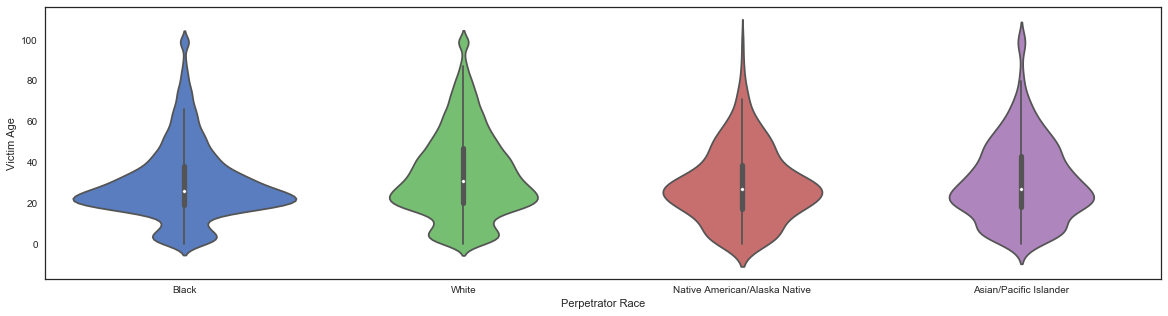

In [38]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="Perpetrator Race", y="Victim Age", hue=None,
                    data=killer, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

## Map

## 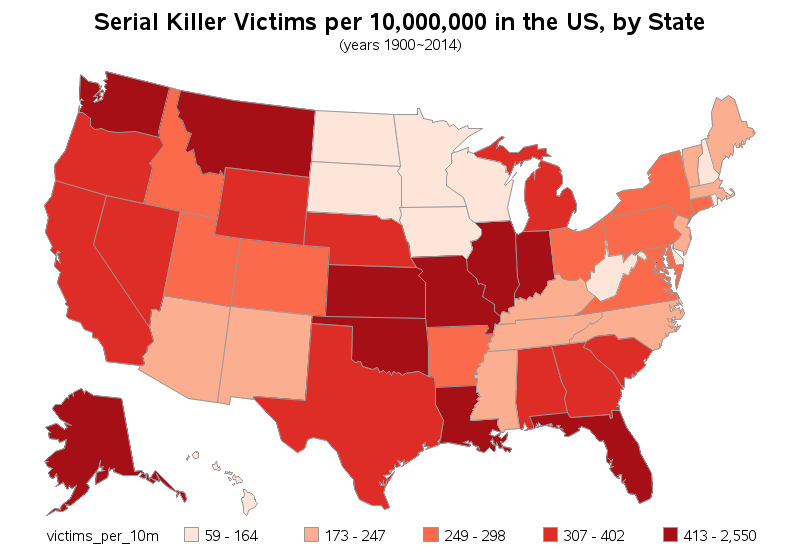

# If ONE MURDER HAPPENED, CAN WE PREDICT WHO IS THE SERIAL KILLER?
### Sex 
### Race
### Age
### Perpetrator Counts
### Relationship


# Chapter 3. Models (Perpetrator Sex)
- Logistic Regression
- Random Forest
- Gradient Boosting
- FAIL: Neural Network

## 3.1 Random Forest
## 3.1.1 Split and Train Dataset

In [39]:
X = killer.drop(['Perpetrator Sex','Perpetrator Age','Perpetrator Race','Relationship','Perpetrator Count'],axis=1,errors='ignore')

In [40]:
#Transform Categorical to Dummies

In [41]:
X = pd.get_dummies(X, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34999 entries, 173 to 638435
Data columns (total 33 columns):
Year                                         34999 non-null int64
Victim Age                                   34999 non-null int64
Victim Count                                 34999 non-null int64
Month_April                                  34999 non-null uint8
Month_August                                 34999 non-null uint8
Month_December                               34999 non-null uint8
Month_February                               34999 non-null uint8
Month_January                                34999 non-null uint8
Month_July                                   34999 non-null uint8
Month_June                                   34999 non-null uint8
Month_March                                  34999 non-null uint8
Month_May                                    34999 non-null uint8
Month_November                               34999 non-null uint8
Month_October                 

In [153]:
sample = pd.read_csv("/Users/Yiyi/Documents/Davis/UCD MSBA/Winter/BAX452 Machine Learning /Individual Presentation/input/Sample.csv")
sample

Year     Month Victim Sex  Victim Age Victim Race  Weapon  Victim Count
0  1992      June     Female          22       White  Poison             3
1  2013  December       Male          60       Black     Gun             2

In [119]:
y = killer['Perpetrator Sex']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 3.1. 2. standardization

In [44]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [45]:
X_train.shape
##since not a big n, we will not do PCA

(24499, 33)

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
# Initialize model by providing parameters
lr = LogisticRegression(C=10, fit_intercept=True)

# Fit a model by providing X and y from training set
lr.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = lr.predict(X_train)

# Make predictions on test data
y_test_pred = lr.predict(X_test)

In [48]:
y_train_pred.shape


(24499,)

## 3.1. 3. Calculate Metric Score

In [49]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [50]:
def print_results(y_true, y_pred):
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_true, y_pred)))

In [51]:
print("Training set scores:")
print_results(y_train, y_train_pred)

Training set scores:
Accuracy of the Logistic Regression is: 0.933589126086779


In [52]:
print("Test set scores:")
print_results(y_test, y_test_pred)

Test set scores:
Accuracy of the Logistic Regression is: 0.936


## 3.1.4. Create Function

In [53]:
def logreg(c, X_train, X_test, y_train, y_test):
    # Import logistic regression from sklearn
    from sklearn.linear_model import LogisticRegression

    # Initialize model by providing parameters
    lr = LogisticRegression(C=c, fit_intercept=True)

    # Fit a model by providing X and y from training set
    lr.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = lr.predict(X_train)

    # Make predictions on test data
    y_test_pred = lr.predict(X_test)
    
    from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
    
    print("Training set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_train, y_train_pred)))
    
    print("Testing set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_test, y_test_pred)))


In [54]:
logreg(10000, X_train, X_test, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.933589126086779
Testing set scores:
Accuracy of the Logistic Regression is: 0.936


## 3.2 Random forest

In [55]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
def random_forest(n, X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier

    model_rfc = RandomForestClassifier(max_features = n)
    model_rfc.fit(X_train, y_train)
    
    # Make prediction on the training data
    y_train_pred = model_rfc.predict(X_train)

    # Make predictions on test data
    y_test_pred = model_rfc.predict(X_test)
    
    from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
    
    print("Training set scores:")
    print("Accuracy of the RF is: {}".format(accuracy_score(y_train, y_train_pred)))
   
    print("Testing set scores:")
    print("Accuracy of the RF is: {}".format(accuracy_score(y_test, y_test_pred)))


In [57]:
random_forest(30, X_train, X_test, y_train, y_test)

Training set scores:
Accuracy of the RF is: 0.993183395240622
Testing set scores:
Accuracy of the RF is: 0.9351428571428572


## 3.3. Gradient Boosting

In [58]:
def grdboost(k, X_train, X_test, y_train, y_test):
    from sklearn.ensemble import GradientBoostingRegressor 
    from sklearn.ensemble import GradientBoostingClassifier
    gbrt=GradientBoostingClassifier(n_estimators=100, max_features = k) 
    gbrt.fit(X_train, y_train) 
#    y_pred=gbrt.predict(X_test) 
    
    y_train_pred = gbrt.predict(X_train)
    y_test_pred = gbrt.predict(X_test)
    
#Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is #able to decipher. 
#print ("R-squared for Train: %.2f" %gbrt.score(X_train, y_train))
#print ("R-squared for Test: %.2f" %gbrt.score(X_test, y_test)) 

#more stats here
    from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
    
    print("Training set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_train, y_train_pred)))
   
    print("Testing set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_test, y_test_pred)))


In [59]:
grdboost(30, X_train, X_test, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.9396710069798767
Testing set scores:
Accuracy of the Logistic Regression is: 0.9385714285714286


## 3.4 Neural Network

In [102]:
num_inputs = len(X.iloc[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765],
       [-0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694],
       [ 0.55876584, -0.60462985,  0.72598647,  0.96680135, -0.67231552],
       [ 0.19466789, -0.9820278 , -0.22685743, -0.91167988,  0.91330594],
       [-0.12770671,  0.89795461,  0.57261197,  0.7325786 , -0.65366916],
       [-0.85010283,  0.20148544, -0.66405563,  0.46676034, -0.18311228],
       [ 0.05581765,  0.87514317,  0.04339224, -0.78361323, -0.68355319],
       [ 0.0904053 ,  0.04880816,  0.27522049, -0.19700911,  0.29961022],
       [-0.20619999,  0.24783223,  0.53480993, -0.64205218, -0.24884846],
       [ 0.00506612,  0.37333416, -0.4926407 ,  0.10948173,  0.24986169],
       [ 0.79100233, -0.27429282,  0.27511415, -0.6171072 , -0.00441177],
       [-0.63510919,  0.83676608, -0.13635586,  0.6603762 , -0.16644739],
       [ 0.80933518, -0.19034957, -0.33765099,  0.14427754,  0.6908873 ],
       [ 0.72202862,  0.19137623, -0.8

In [120]:
#X = pd.get_dummies(X, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
maps = {'Female':0, 'Male':1}

num_outputs = len(y.iloc[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2
y= y.map(maps)
y

173       1
174       1
190       1
223       1
314       1
315       1
316       1
352       1
353       1
372       1
373       1
381       1
432       1
433       1
452       1
453       1
454       1
458       1
485       1
486       1
494       1
495       1
508       1
510       1
575       1
576       1
577       1
587       1
589       1
613       1
         ..
638166    1
638177    1
638182    1
638191    1
638206    1
638208    1
638214    1
638215    1
638225    1
638226    1
638271    1
638272    1
638274    1
638286    1
638295    1
638322    1
638371    1
638372    1
638373    1
638374    1
638376    1
638378    1
638385    1
638393    1
638402    1
638403    1
638426    1
638427    1
638434    0
638435    0
Name: Perpetrator Sex, Length: 34999, dtype: int64

In [121]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

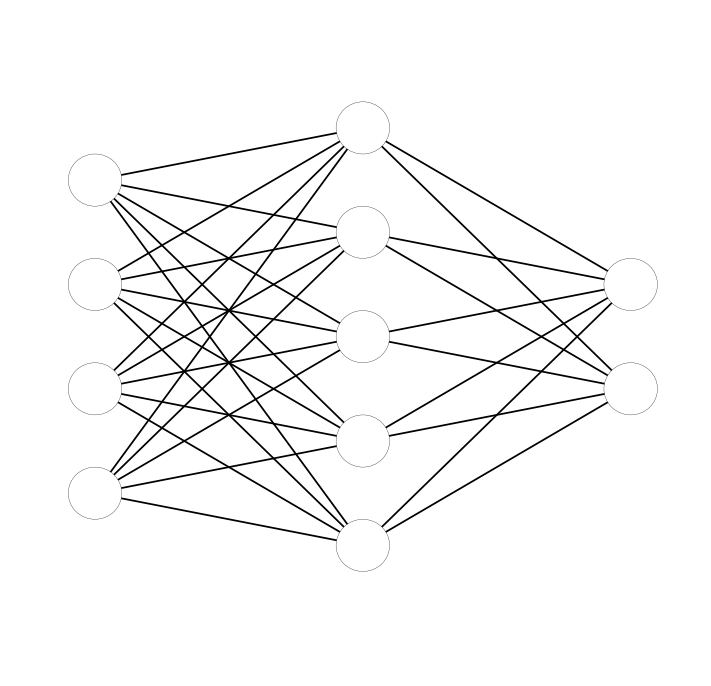

In [122]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 5, 2])

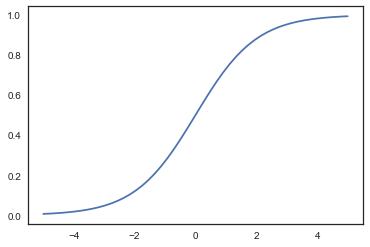

In [107]:
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

In [131]:
yy =y-12
abs(yy)
abs(yy).mean()

11.065687591074031

# Chapter 4 Predict Relationship

In [159]:
X = killer.drop(['Perpetrator Sex','Perpetrator Age','Perpetrator Race','Relationship','Perpetrator Count'],axis=1,errors='ignore')
X.head()

Year     Month Victim Sex  Victim Age Victim Race Weapon  Victim Count
173  1980  December       Male          24       Black    Gun             2
174  1980  December       Male          18       Black    Gun             2
190  1980      July       Male          50       White  Knife             2
223  1980      July       Male          38       White  Knife             2
314  1980     April       Male          71       White    Gun             3

In [67]:
X = pd.get_dummies(X, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34999 entries, 173 to 638435
Data columns (total 33 columns):
Year                                         34999 non-null int64
Victim Age                                   34999 non-null int64
Victim Count                                 34999 non-null int64
Month_April                                  34999 non-null uint8
Month_August                                 34999 non-null uint8
Month_December                               34999 non-null uint8
Month_February                               34999 non-null uint8
Month_January                                34999 non-null uint8
Month_July                                   34999 non-null uint8
Month_June                                   34999 non-null uint8
Month_March                                  34999 non-null uint8
Month_May                                    34999 non-null uint8
Month_November                               34999 non-null uint8
Month_October                 

In [143]:
y = killer['Relationship']
y.head()

173    Acquaintance
174    Acquaintance
190        Stranger
223        Stranger
314        Stranger
Name: Relationship, dtype: object

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [70]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [71]:
# Initialize model by providing parameters
lr = LogisticRegression(C=10, fit_intercept=True)

# Fit a model by providing X and y from training set
lr.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = lr.predict(X_train)

# Make predictions on test data
y_test_pred = lr.predict(X_test)

In [72]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [73]:
def logreg(c, X_train, X_test, y_train, y_test):
    # Import logistic regression from sklearn
    from sklearn.linear_model import LogisticRegression

    # Initialize model by providing parameters
    lr = LogisticRegression(C=c, fit_intercept=True)

    # Fit a model by providing X and y from training set
    lr.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = lr.predict(X_train)

    # Make predictions on test data
    y_test_pred = lr.predict(X_test)
    
    from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
    
    print("Training set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_train, y_train_pred)))
    
    print("Testing set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_test, y_test_pred)))


In [74]:
logreg(10000, X_train, X_test, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.4042205804318544
Testing set scores:
Accuracy of the Logistic Regression is: 0.39295238095238094


## 4.2. Random Forest

In [75]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
def random_forest(n, X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier

    model_rfc = RandomForestClassifier(max_features = n)
    model_rfc.fit(X_train, y_train)
    
    # Make prediction on the training data
    y_train_pred = model_rfc.predict(X_train)

    # Make predictions on test data
    y_test_pred = model_rfc.predict(X_test)
    
    from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
    
    print("Training set scores:")
    print("Accuracy of the RF is: {}".format(accuracy_score(y_train, y_train_pred)))
   
    print("Testing set scores:")
    print("Accuracy of the RF is: {}".format(accuracy_score(y_test, y_test_pred)))


In [77]:
random_forest(30, X_train, X_test, y_train,y_test)

Training set scores:
Accuracy of the RF is: 0.9476713335238173
Testing set scores:
Accuracy of the RF is: 0.4277142857142857


In [156]:
sample
sample = pd.get_dummies(sample, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

## 4.3. Gradient Boosting

In [78]:
def grdboost(k, X_train, X_test, y_train, y_test):
    from sklearn.ensemble import GradientBoostingRegressor 
    from sklearn.ensemble import GradientBoostingClassifier
    gbrt=GradientBoostingClassifier(n_estimators=100, max_features = k) 
    gbrt.fit(X_train, y_train) 
#    y_pred=gbrt.predict(X_test) 
    
    y_train_pred = gbrt.predict(X_train)
    y_test_pred = gbrt.predict(X_test)
    
#Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is #able to decipher. 
#print ("R-squared for Train: %.2f" %gbrt.score(X_train, y_train))
#print ("R-squared for Test: %.2f" %gbrt.score(X_test, y_test)) 

#more stats here
    from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
    
    print("Training set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_train, y_train_pred)))
   
    print("Testing set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_test, y_test_pred)))


In [79]:
grdboost(33, X_train, X_test, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.4739785297359076
Testing set scores:
Accuracy of the Logistic Regression is: 0.4452380952380952


# Chapter 5 Perpetrator Race

In [80]:
y = killer['Perpetrator Race']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [82]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## 5.1 Logistic Regression

In [83]:
# Initialize model by providing parameters
lr = LogisticRegression(C=10, fit_intercept=True)

# Fit a model by providing X and y from training set
lr.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = lr.predict(X_train)

# Make predictions on test data
y_test_pred = lr.predict(X_test)

In [84]:
logreg(34, X_train, X_test, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.8691375158169721
Testing set scores:
Accuracy of the Logistic Regression is: 0.8829523809523809


## 5.2 Random forest

In [85]:
random_forest(30, X_train, X_test, y_train,y_test)

Training set scores:
Accuracy of the RF is: 0.977835830033879
Testing set scores:
Accuracy of the RF is: 0.8621904761904762


## 5.3 Grandient Boosting

In [86]:
grdboost(33, X_train, X_test, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.8742397648883627
Testing set scores:
Accuracy of the Logistic Regression is: 0.8864761904761905


# Chapter 6. Perpetrator Age

In [87]:
y = killer['Perpetrator Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Chapter 6.1. LR

In [88]:
# Initialize model by providing parameters
lr = LogisticRegression(C=10, fit_intercept=True)

# Fit a model by providing X and y from training set
lr.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = lr.predict(X_train)

# Make predictions on test data
y_test_pred = lr.predict(X_test)

logreg(34, X_train, X_test, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.061063716886403524
Testing set scores:
Accuracy of the Logistic Regression is: 0.05447619047619048


## Chapter 6.2. RF

In [89]:
random_forest(33, X_train, X_test, y_train,y_test)

Training set scores:
Accuracy of the RF is: 0.937793379321605
Testing set scores:
Accuracy of the RF is: 0.1718095238095238


## Chapter 6.3. Gradient Boosting

In [90]:
grdboost(33, X_train, X_test, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.24613249520388586
Testing set scores:
Accuracy of the Logistic Regression is: 0.12904761904761905


# Chapter 7 How many Perpetrators?

In [91]:
y = killer['Perpetrator Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## 7.1 LR

In [92]:
# Initialize model by providing parameters
lr = LogisticRegression(C=10, fit_intercept=True)

# Fit a model by providing X and y from training set
lr.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = lr.predict(X_train)

# Make predictions on test data
y_test_pred = lr.predict(X_test)

logreg(34, X_train, X_test, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.7744805910445325
Testing set scores:
Accuracy of the Logistic Regression is: 0.7785714285714286


## 7.2 RF

In [93]:
random_forest(33, X_train, X_test, y_train,y_test)

Training set scores:
Accuracy of the RF is: 0.956039022000898
Testing set scores:
Accuracy of the RF is: 0.7578095238095238


## 7.3. Gradient Boosting

In [94]:
grdboost(33, X_train, X_test, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.7826850075513286
Testing set scores:
Accuracy of the Logistic Regression is: 0.784


## Final Takeaway:

### GB for Sex 0.94~
### GB for relationship: 0.45~
### GB for Race:0.88~
### RF for Age: 0.171~
### GB for Perpetrator Counts: 0.784~

## HOPEFULLY we can cacth the serial killer with the Algorithm!

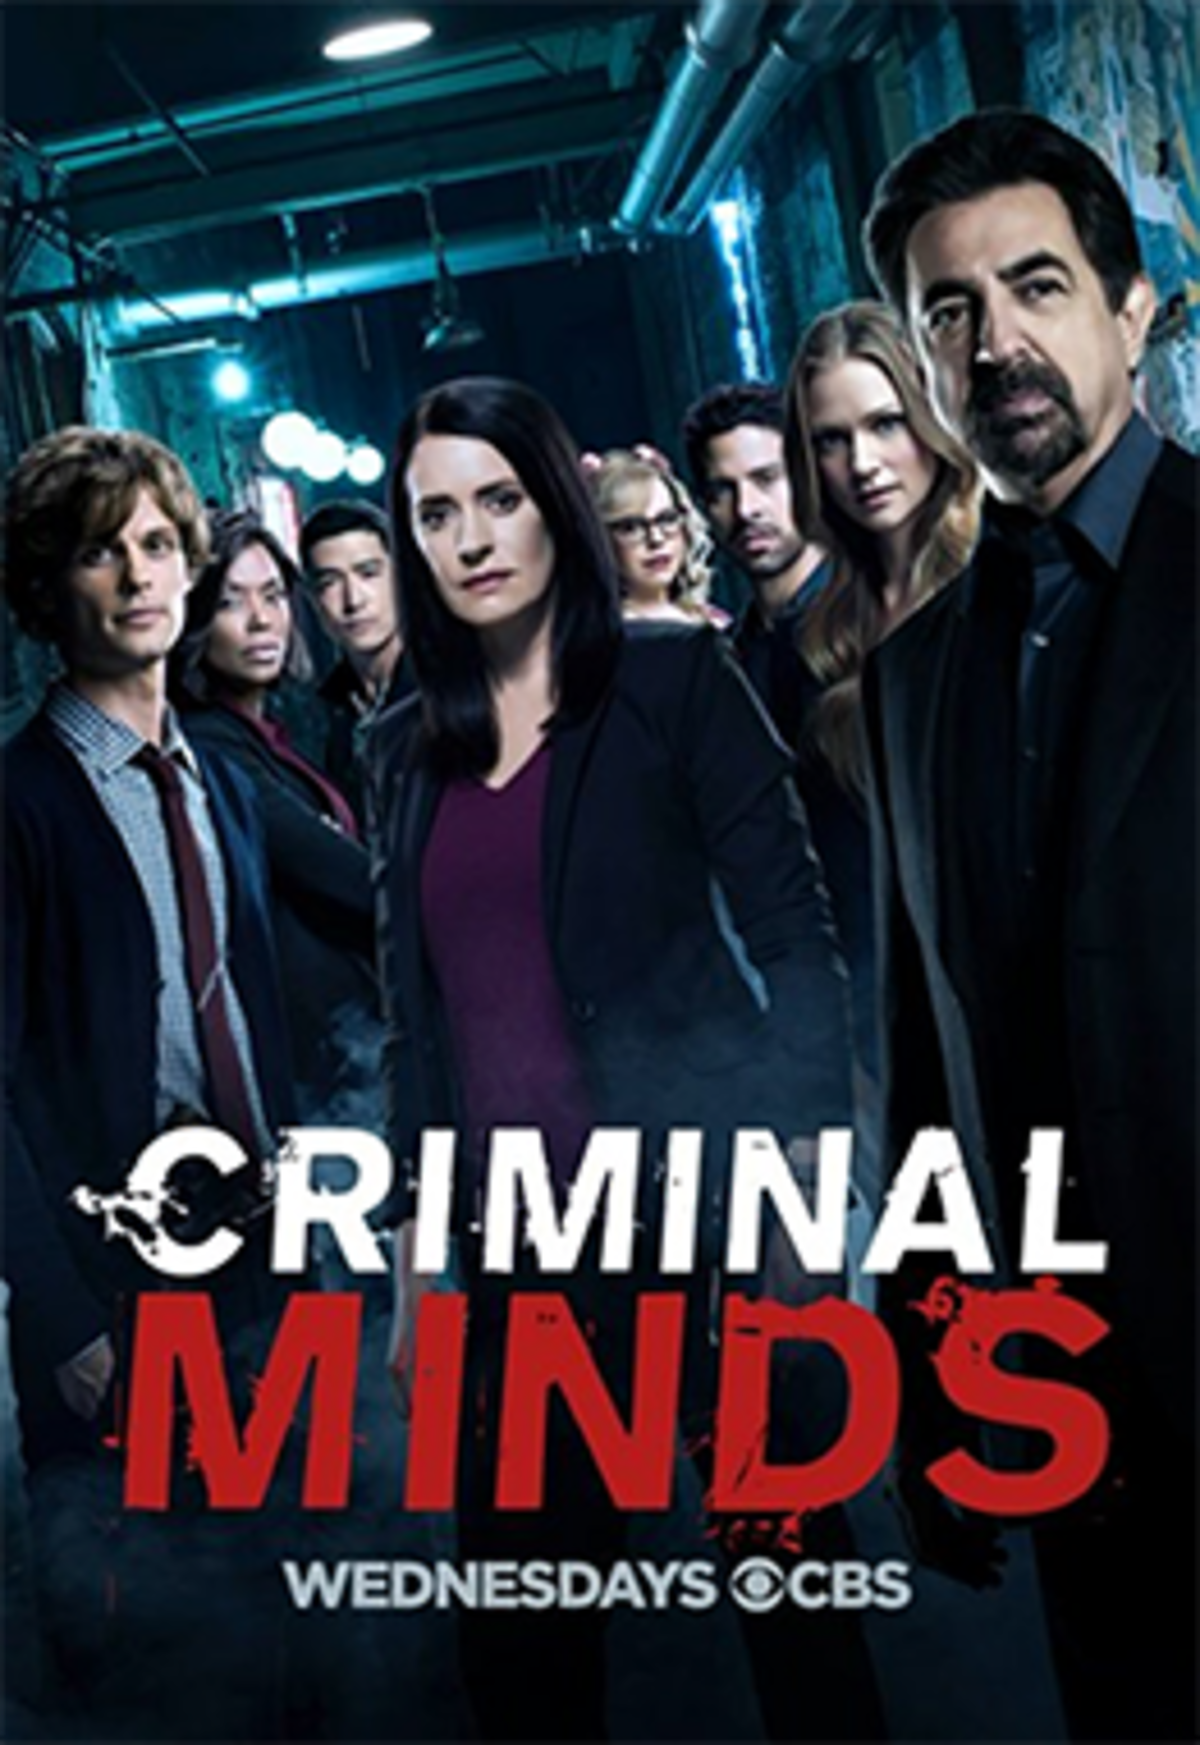